In [1]:
import cobra.test
import os
from os.path import join
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite
from cobra.util import create_stoichiometric_matrix
import numpy as np
model = cobra.io.load_json_model(join("RehMBEL1391_sbml_L3V1.json"))

In [2]:
len(model.reactions)

1538

In [3]:
len(model.metabolites)

1348

In [4]:
len(model.genes)

1350

In [5]:
model.medium

{'EX_fe2_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_pi_e': 100.0,
 'EX_cobalt2_e': 10.0,
 'EX_cl_e': 10.0,
 'EX_k_e': 10.0,
 'EX_fe3_e': 10.0,
 'EX_so4_e': 10.0,
 'EX_fru_e': 3.0,
 'EX_nh4_e': 10.0,
 'EX_na_e': 10.0,
 'EX_o2_e': 18.5,
 'EX_mobd_e': 10.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 100.0}

In [6]:
model

Name,RehMBEL1391
Memory address,0x01ccac5c75e0
Number of metabolites,1348
Number of reactions,1538
Number of groups,0
Objective expression,1.0*Biomass - 1.0*Biomass_reverse_57a34
Compartments,"c, e"


In [7]:
model.metabolites[0:10]

[<Metabolite zoe_c at 0x1ccabb16d30>,
 <Metabolite 3hbz_c at 0x1ccac59f3d0>,
 <Metabolite hco3_c at 0x1ccac59f400>,
 <Metabolite actp_c at 0x1ccac59f370>,
 <Metabolite glytrna_c at 0x1ccac59f340>,
 <Metabolite phaccoa_c at 0x1ccac59f310>,
 <Metabolite 2h3mbzpyr_c at 0x1ccac59f2e0>,
 <Metabolite mettrna_c at 0x1ccac59f2b0>,
 <Metabolite ugmd_c at 0x1ccac59f280>,
 <Metabolite adprib_c at 0x1ccac59f250>]

In [8]:
model.metabolites.phb_e
model.reactions.EX_pbhb_e

#figuring out the PHA-production-pathway that is included in the provided model 
for reactions in model.metabolites.get_by_id("phb_c").reactions: 
    print(reactions, reactions.name)  

for reactions in model.metabolites.get_by_id("phb_e").reactions: 
    print(reactions, reactions.name)

PHAS: r3hbcoa_c <=> coa_c + phb_c Polyhydroxyalkanoate synthase
PHBD: h2o_c + phb_c <=> h_c + r3hbn2_c + r3rhbb_c Poly(3-hydroxybutyrate) depolymerase
PHBt: h_c + phb_c --> h_e + phb_e Poly-beta-hydroxybutyrate transport
EX_pbhb_e: phb_e -->  EX_pbhb_e
PHBt: h_c + phb_c --> h_e + phb_e Poly-beta-hydroxybutyrate transport


In [9]:
for reactions in model.metabolites.get_by_id("r3hbcoa_c").reactions: 
    print(reactions, reactions.name)

AACOAR: nadp_c + r3hbcoa_c <=> aacoa_c + h_c + nadph_c Acetoacetyl-CoA reductase
3HBCD: r3hbcoa_c <=> b2coa_c + h2o_c 3-hydroxybutyryl-CoA dehydratase
PHAS: r3hbcoa_c <=> coa_c + phb_c Polyhydroxyalkanoate synthase


In [10]:
for reactions in model.metabolites.get_by_id("r3hbn2_c").reactions: 
    print(reactions, reactions.name)
#found a dead-end

PHBD: h2o_c + phb_c <=> h_c + r3hbn2_c + r3rhbb_c Poly(3-hydroxybutyrate) depolymerase


In [11]:
for reactions in model.metabolites.get_by_id("r3rhbb_c").reactions:
    print(reactions)

HBDH: h2o_c + r3rhbb_c <=> 2.0 bhb_c + h_c
PHBD: h2o_c + phb_c <=> h_c + r3hbn2_c + r3rhbb_c


In [12]:
for reactions in model.metabolites.get_by_id("b2coa_c").reactions: 
    print(reactions, reactions.name)

3HBCD: r3hbcoa_c <=> b2coa_c + h2o_c 3-hydroxybutyryl-CoA dehydratase
GLUCD1: gcoa_c + nad_c --> b2coa_c + co2_c + nadh_c Glutaryl-CoA dehydrogenase
ENCOAH1: 3hbcoa_c <=> b2coa_c + h2o_c Enoyl-CoA hydratase
ACOADH1: btcoa_c + fad_c + h_c <=> b2coa_c + fadh2_c Acyl-CoA dehydrogenase butanoyl-CoA)


In [13]:
for reactions in model.metabolites.get_by_id("aacoa_c").reactions: 
    print(reactions, reactions.name)

AACOAS: acac_c + atp_c + coa_c --> aacoa_c + amp_c + h_c + ppi_c Acetoacetyl-CoA synthetase
ACACT1r: 2.0 accoa_c <=> aacoa_c + coa_c Acetyl-CoA C-acetyltransferase
AACOAR: nadp_c + r3hbcoa_c <=> aacoa_c + h_c + nadph_c Acetoacetyl-CoA reductase
OCOAT1m: acac_c + succoa_c <=> aacoa_c + succ_c 3-oxoacid CoA-transferase
3HBCDH: 3hbcoa_c + nadp_c --> aacoa_c + h_c + nadph_c 3-hydroxybutyryl-CoA dehydrogenase
HACD1: 3hbcoa_c + nad_c --> aacoa_c + h_c + nadh_c 3-hydroxyacyl-CoA dehydrogenase (acetoacetyl-CoA)


In [14]:
#to figure out the names of the IDs we printed them
print(model.metabolites.aacoa_c, ' = ', model.metabolites.aacoa_c.name)
print(model.metabolites.acac_c, ' = ', model.metabolites.acac_c.name)
print(model.metabolites.succoa_c, ' = ', model.metabolites.succoa_c.name)
print(model.metabolites.gcoa_c, ' = ',model.metabolites.gcoa_c.name)
print(model.metabolites.oaa_c, ' = ',model.metabolites.oaa_c.name)
print(model.metabolites.accoa_c, ' = ',model.metabolites.accoa_c.name)
print(model.metabolites.btcoa_c, ' = ',model.metabolites.btcoa_c.name)
print(model.metabolites.b2coa_c, ' = ',model.metabolites.b2coa_c.name)
print(model.metabolites.r3rhbb_c, ' = ',model.metabolites.r3rhbb_c.name)
print(model.metabolites.r3hbn2_c, ' = ',model.metabolites.r3hbn2_c.name)
print(model.metabolites.bhb_c, ' = ',model.metabolites.bhb_c.name)

aacoa_c  =  Acetoacetyl-CoA
acac_c  =  Acetoacetate
succoa_c  =  Succinyl-CoA
gcoa_c  =  Glutaryl-CoA
oaa_c  =  Oxaloacetate
accoa_c  =  Acetyl-CoA
btcoa_c  =  Butanoyl-CoA
b2coa_c  =  Crotonoyl-CoA
r3rhbb_c  =  (R)-3-((R)-3-Hydroxybutanoyloxy)butanoate
r3hbn2_c  =  ((R)-3-Hydroxybutanoyl)(n-2)
bhb_c  =  (R)-3-Hydroxybutanoate


In [15]:
#whenever we found a metabolite without an assigned molecular formula we added it in accordance with data found on pubchem
model.metabolites.get_by_id("3hadpcoa_c")
#change molecluar formula of 3hadpcoa_c in accordance with data found on pubchem(https://pubchem.ncbi.nlm.nih.gov/compound/3S_-3-Hydroxyadipyl-CoA) 
model.metabolites.get_by_id("3hadpcoa_c").elements = {"C": 27, "H": 44, "N": 7, "O": 20, "P":3, "S":1}

#confirm that the molecular formula was updated
print(model.metabolites.get_by_id("3hadpcoa_c").name, 'molecular formula is', model.metabolites.get_by_id("3hadpcoa_c").formula)

(3S)-3-Hydroxyadipyl-CoA molecular formula is C27H44N7O20P3S


In [16]:
#finding the names of hydroxyacyl-CoA included in the model to later create an reaction where they react to PHA 
for metabolite in model.metabolites.query('yl-CoA', 'name'):
    print(metabolite.name, '=', metabolite.id)

Phenylacetyl-CoA = phaccoa_c
2-Methylbut-2-enoyl-CoATiglyl-CoA = 2m2ecoa_c
Anthranilyl-CoA = anthcoa_c
crotonobetainyl-CoA = ctbtcoa_c
Crotonoyl-CoA = b2coa_c
Propanoyl-CoA = ppcoa_c
2-Amino-5-oxocyclohex-1-enecarbonyl-CoA = 2amoeccoa_c
3-Hydroxypropionyl-CoA = 3hpcoa_c
2-Methylprop-2-enoyl-CoA = 2mp2coa_c
O-Succinylbenzoyl-CoA = sbzcoa_c
Pimeloyl-CoA = pmcoa_c
Succinyl-CoA = succoa_c
Glutaryl-CoA = gcoa_c
5-Methyl-3-oxo-4-hexenoyl-CoA = 5m3o4hcoa_c
(2E)-5-Methylhexa-2,4-dienoyl-CoA = 2e5mhdcoa_c
Cyclohexane-1-carboxyl-CoA = cchccoa_c
Malonyl-CoA = malcoa_c
3-Oxopropionyl-CoA = 3oppcoa_c
Adipyl-CoA = adipcoa_c
2-Ketocyclohexane-1-carboxyl-CoA = 2kchccoa_c
Naphthyl-2-methyl-succinyl-CoA = napmsccoa_c
2-Hydroxycyclohexane-1-carboxyl-CoA = hcchccoa_c
3-Methylcrotonyl-CoA = 3mccoa_c
(S)-Methylmalonyl-CoA = mmcoa__S_c
5-Methylhex-4-enoyl-CoA = 5mh4ecoa_c
3-Hydroxypimeloyl-CoA = hpimcoa_c
Naphthyl-2-oxomethyl-succinyl-CoA = napomsuccoa_c
6-Hydroxycyclohex-1-enecarbonyl-CoA = 6hcecoa_c
4-Hydr

In [17]:
#results for R-3-hydroxyacyl-CoAs from generated list 
#A total of 6 3-hydroxyacyl-CoAs has been found, but only 1 is available as an (R)-isomer
#potential to include epimerisation reaction, where S-epimers are converted into R-epimers
print(model.metabolites.get_by_id("3hadpcoa_c"), ' = ', model.metabolites.get_by_id("3hadpcoa_c").name)
print(model.metabolites.get_by_id("hpimcoa_c"), ' = ', model.metabolites.get_by_id("hpimcoa_c").name)
print(model.metabolites.get_by_id("3hpcoa_c"), ' = ', model.metabolites.get_by_id("3hpcoa_c").name)
print(model.metabolites.get_by_id("r3hbcoa_c"), ' = ', model.metabolites.get_by_id("r3hbcoa_c").name)
print(model.metabolites.get_by_id("3hbcoa_c"), ' = ', model.metabolites.get_by_id("3hbcoa_c").name)
print(model.metabolites.get_by_id("3hibutcoa_c"), ' = ', model.metabolites.get_by_id("3hibutcoa_c").name)

3hadpcoa_c  =  (3S)-3-Hydroxyadipyl-CoA
hpimcoa_c  =  3-Hydroxypimeloyl-CoA
3hpcoa_c  =  3-Hydroxypropionyl-CoA
r3hbcoa_c  =  (R)-3-Hydroxybutanoyl-CoA
3hbcoa_c  =  (S)-3-Hydroxybutanoyl-CoA
3hibutcoa_c  =  (S)-3-Hydroxyisobutyryl-CoA


**result:**

*S-epimers:*
- 3hadpcoa_c  =  (3S)-3-Hydroxyadipyl-CoA
- 3hbcoa_c  =  (S)-3-Hydroxybutanoyl-CoA
- 3hibutcoa_c  =  (S)-3-Hydroxyisobutyryl-CoA

*R-epimers:*
- hpimcoa_c  =  3-Hydroxypimeloyl-CoA
- 3hpcoa_c  =  3-Hydroxypropionyl-CoA
- r3hbcoa_c  =  (R)-3-Hydroxybutanoyl-CoA

In [18]:
print(model.metabolites.hpimcoa_c.elements)
#add missing molecular formula with data found on PubChem ("https://pubchem.ncbi.nlm.nih.gov/compound/9543022")
model.metabolites.get_by_id("hpimcoa_c").elements = {"C": 28, "H": 46, "N": 7, "O": 20, "P":3, "S":1}
#check
print(model.metabolites.get_by_id("hpimcoa_c").name, 'molecular formula is', model.metabolites.get_by_id("hpimcoa_c").formula)

{}
3-Hydroxypimeloyl-CoA molecular formula is C28H46N7O20P3S


In [19]:
print(model.metabolites.r3hbcoa_c.elements)
#add missing molecular formula for r3hbcoa_3
model.metabolites.r3hbcoa_c.elements = {"C": 25,"H": 42,"N": 7,"O": 18,"P": 3,"S": 1}
print('The molecular formula of', model.metabolites.get_by_id("r3hbcoa_c").name, 'is', model.metabolites.get_by_id("r3hbcoa_c").formula)

#add molecular formula for r3rhbb_c and r3hbn2_c
model.metabolites.r3rhbb_c.elements = {"C": 8, "H": 13, "O": 5}
model.metabolites.r3hbn2_c.elements = {"C": 4, "H": 6, "O": 2}
#print to check whether it was successful
print('The molecular formula of', model.metabolites.get_by_id("r3rhbb_c").name, 'is', model.metabolites.get_by_id("r3rhbb_c").formula)
print('The molecular formula of', model.metabolites.get_by_id("r3hbn2_c").name, 'is', model.metabolites.get_by_id("r3hbn2_c").formula)

{}
The molecular formula of (R)-3-Hydroxybutanoyl-CoA is C25H42N7O18P3S
The molecular formula of (R)-3-((R)-3-Hydroxybutanoyloxy)butanoate is C8H13O5
The molecular formula of ((R)-3-Hydroxybutanoyl)(n-2) is C4H6O2


In [20]:
#there is no molecular formula for phb
model.metabolites.get_by_id("phb_e").elements

{}

In [21]:
#check which metabolite-ids are already taken that could resemble PHA-names
for metabolite in model.metabolites.query('phhx_c', 'name'):
    print(metabolite)
for metabolite in model.metabolites.query('phh_c', 'name'):
    print(metabolite)
for metabolite in model.metabolites.query('phho_c', 'name'):
    print(metabolite)
for metabolite in model.metabolites.query('phn_c', 'name'):
    print(metabolite)
for metabolite in model.metabolites.query('phd_c', 'name'):
    print(metabolite)
#nothing got printed meaning none of the names have been used before in the model.

In [22]:
#creating metabolites, giving them a unique ID according to the abbreviation of their full name
PHHx = Metabolite(id="phhx_c", compartment ="c", name ="Polyhydroxyhexanoate")
PHH = Metabolite(id="phh_c", compartment = "c", name ="Polyhydroxyheptanoate")
PHHO = Metabolite(id="phho_c", compartment ="c", name ="Polyhydroxyoctanoate")
PHN = Metabolite(id="phn_c", compartment = "c", name ="Polyhydroxynonaoate")
PHD = Metabolite(id="phd_c", compartment = "c", name ="Polyhydroxydecanoate")

In [23]:
#creating new reactions to model the production of medium-chain-length PHAs from (R)-3-Hydroxybutanoyl-CoA
mcl_PHA_model = model
phaC_PHHx_r3hbcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHHx_from_r3hbcoa_c')
phaC_PHH_r3hbcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHH_from_r3hbcoa_c')
phaC_PHHO_r3hbcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHHO_from_r3hbcoa_c')
phaC_PHN_r3hbcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHN_from_r3hbcoa_c')
phaC_PHD_r3hbcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHD_from_r3hbcoa_c')

#creating new reactions to model the production of (R)-3-Hydroxybutanoyl-CoA from medium-chain-length PHA 
phaC_r3hbcoa_c_PHHx = Reaction('PHHx_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')
phaC_r3hbcoa_c_PHH = Reaction('PHH_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')
phaC_r3hbcoa_c_PHHO = Reaction('PHHO_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')
phaC_r3hbcoa_c_PHN = Reaction('PHN_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')
phaC_r3hbcoa_c_PHD = Reaction('PHD_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')

From KEGG ENZYME:2.3.1.304 (https://www.genome.jp/entry/2.3.1.304) 

reaction equation:
(3R)-3-hydroxyacyl-CoA + poly[(R)-3-hydroxyalkanoate]n = CoA + poly[(R)-3-hydroxyalkanoate]n+1

for easier handling in this model:
hydroxyacyl-CoA = CoA + polyhydroxyalkanoate

In [24]:
#adding stochiometric data and involved metabolites to new reactions to model to produce medium-chain-length PHA from (R)-3-Hydroxybutanoyl-CoA
phaC_PHHx_r3hbcoa_c.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: -1,
                                PHHx: 1,
                                   mcl_PHA_model.metabolites.coa_c: 1})
phaC_PHH_r3hbcoa_c.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: -1,
                                PHH: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1, })
phaC_PHHO_r3hbcoa_c.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: -1,
                                PHHO: 1,
                                   mcl_PHA_model.metabolites.coa_c: 1, })
phaC_PHN_r3hbcoa_c.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: -1,
                                PHN: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHD_r3hbcoa_c.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: -1,
                                PHD: 1,
                                   mcl_PHA_model.metabolites.coa_c: 1,})

#adding other direction of reactions as well
phaC_r3hbcoa_c_PHHx.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: 1,
                                PHHx: -1,
                                   mcl_PHA_model.metabolites.coa_c: -1})
phaC_r3hbcoa_c_PHH.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: 1,
                                PHH: -1, 
                                   mcl_PHA_model.metabolites.coa_c: -1, })
phaC_r3hbcoa_c_PHHO.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: 1,
                                PHHO: -1,
                                   mcl_PHA_model.metabolites.coa_c: -1, })
phaC_r3hbcoa_c_PHN.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: 1,
                                PHN: -1, 
                                   mcl_PHA_model.metabolites.coa_c: -1,})
phaC_r3hbcoa_c_PHD.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: 1,
                                PHD: -1,
                                   mcl_PHA_model.metabolites.coa_c: -1,})

In [25]:
#adding the reactions to the model
mcl_PHA_model.add_reactions([phaC_PHHx_r3hbcoa_c])
mcl_PHA_model.add_reactions([phaC_PHH_r3hbcoa_c])
mcl_PHA_model.add_reactions([phaC_PHHO_r3hbcoa_c])
mcl_PHA_model.add_reactions([phaC_PHN_r3hbcoa_c])
mcl_PHA_model.add_reactions([phaC_PHD_r3hbcoa_c])

mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHHx])
mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHH])
mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHHO])
mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHN])
mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHD])

In [26]:
#never forget to set boundaries for newly added reactions
#somehow never added for the other reactions? 
#mcl_PHA_model.add_boundary(mcl_PHA_model.metabolites.phhx_c, type="demand")
#mcl_PHA_model.add_boundary(mcl_PHA_model.metabolites.phh_c, type="demand")
#mcl_PHA_model.add_boundary(mcl_PHA_model.metabolites.phho_c, type="demand")
#mcl_PHA_model.add_boundary(mcl_PHA_model.metabolites.phn_c, type="demand")
#mcl_PHA_model.add_boundary(mcl_PHA_model.metabolites.phd_c, type="demand")

In [27]:
#it works 
#doing the same for the other 3-Hydroxyacetyl-CoAs

#creating new reaction to model to produce medium-chain-length PHA from 3-Hydroxypimeloyl-CoA
phaC_PHHx_hpimcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHHx_from_hpimcoa_c')
phaC_PHH_hpimcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHH_from_hpimcoa_c')
phaC_PHHO_hpimcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHHO_from_hpimcoa_c')
phaC_PHN_hpimcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHN_from_hpimcoa_c')
phaC_PHD_hpimcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHD_from_hpimcoa_c')

#creating new reactions to model the production of 3-Hydroxypimeloyl-CoA from medium-chain-length PHA 
phaC_hpimcoa_c_PHHx = Reaction('PHHx_breakdown_to_3-Hydroxypimeloyl-CoA')
phaC_hpimcoa_c_PHH = Reaction('PHH_breakdown_to_3-Hydroxypimeloyl-CoA')
phaC_hpimcoa_c_PHHO = Reaction('PHHO_breakdown_to_3-Hydroxypimeloyl-CoA')
phaC_hpimcoa_c_PHN = Reaction('PHN_breakdown_to_3-Hydroxypimeloyl-CoA')
phaC_hpimcoa_c_PHD = Reaction('PHD_breakdown_to_3-Hydroxypimeloyl-CoA')

#adding stochiometric data and involved metabolites to new reactions to model the production of medium-chain-length PHA from 3-Hydroxypimeloyl-CoA
phaC_PHHx_hpimcoa_c.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: -1,
                                PHHx: 1, 
                                    mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHH_hpimcoa_c.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: -1,
                                PHH: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHHO_hpimcoa_c.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: -1,
                                PHHO: 1, 
                                    mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHN_hpimcoa_c.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: -1,
                                PHN: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHD_hpimcoa_c.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: -1,
                                PHD: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})

#adding stochiometric data and involved metabolites to new reactions to model the break-down of medium-chain-length PHA to 3-Hydroxypimeloyl-CoA
phaC_hpimcoa_c_PHHx.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: 1,
                                PHHx: -1, 
                                    mcl_PHA_model.metabolites.coa_c: -1,})
phaC_hpimcoa_c_PHH.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: 1,
                                PHH: -1, 
                                   mcl_PHA_model.metabolites.coa_c: -1,})
phaC_hpimcoa_c_PHHO.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: 1,
                                PHHO: -1, 
                                    mcl_PHA_model.metabolites.coa_c: -1,})
phaC_hpimcoa_c_PHN.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: 1,
                                PHN: -1, 
                                   mcl_PHA_model.metabolites.coa_c: -1,})
phaC_hpimcoa_c_PHD.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: 1,
                                PHD: -1, 
                                   mcl_PHA_model.metabolites.coa_c: -1,})

#adding the reactions to the model
mcl_PHA_model.add_reactions([phaC_PHHx_hpimcoa_c])
mcl_PHA_model.add_reactions([phaC_PHH_hpimcoa_c])
mcl_PHA_model.add_reactions([phaC_PHHO_hpimcoa_c])
mcl_PHA_model.add_reactions([phaC_PHN_hpimcoa_c])
mcl_PHA_model.add_reactions([phaC_PHD_hpimcoa_c])

mcl_PHA_model.add_reactions([phaC_hpimcoa_c_PHHx])
mcl_PHA_model.add_reactions([phaC_hpimcoa_c_PHH])
mcl_PHA_model.add_reactions([phaC_hpimcoa_c_PHHO])
mcl_PHA_model.add_reactions([phaC_hpimcoa_c_PHN])
mcl_PHA_model.add_reactions([phaC_hpimcoa_c_PHD])


In [28]:
#it works 
#doing the same for 3-Hydroxypropionyl

#creating new reaction to model to produce medium-chain-length PHA from 3-Hydroxypropionyl-CoA
phaC_PHHx_3hpcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHHx_from_3hpcoa_c')
phaC_PHH_3hpcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHH_from_3hpcoa_c')
phaC_PHHO_3hpcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHHO_from_3hpcoa_c')
phaC_PHN_3hpcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHN_from_3hpcoa_c')
phaC_PHD_3hpcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHD_from_3hpcoa_c')

#creating new reactions to model the production of 3-Hydroxypropionyl-CoA from medium-chain-length PHA 
phaC_3hpcoa_c_PHHx = Reaction('PHHx_breakdown_to_3-Hydroxypropionyl-CoA')
phaC_3hpcoa_c_PHH = Reaction('PHH_breakdown_to_3-Hydroxypropionyl-CoA')
phaC_3hpcoa_c_PHHO = Reaction('PHHO_breakdown_to_3-Hydroxypropionyl-CoA')
phaC_3hpcoa_c_PHN = Reaction('PHN_breakdown_to_3-Hydroxypropionyl-CoA')
phaC_3hpcoa_c_PHD = Reaction('PHD_breakdown_to_3-Hydroxypropionyl-CoA')

#adding stochiometric data and involved metabolites to new reactions to model the production of mcl-PHAs from 3-Hydroxypropionyl-CoA
phaC_PHHx_3hpcoa_c.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): -1,
                                PHHx: 1, 
                                    mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHH_3hpcoa_c.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): -1,
                                PHH: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHHO_3hpcoa_c.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): -1,
                                PHHO: 1, 
                                    mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHN_3hpcoa_c.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): -1,
                                PHN: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHD_3hpcoa_c.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): -1,
                                PHD: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})

#adding stochiometric data and involved metabolites to new reactions to model the break-down of medium-chain-length PHA to 3-Hydroxypropionyl-CoA
phaC_3hpcoa_c_PHHx.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): 1,
                                PHHx: -1, 
                                    mcl_PHA_model.metabolites.coa_c: -1,})
phaC_3hpcoa_c_PHH.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): 1,
                                PHH: -1, 
                                   mcl_PHA_model.metabolites.coa_c: -1,})
phaC_3hpcoa_c_PHHO.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): 1,
                                PHHO: -1, 
                                    mcl_PHA_model.metabolites.coa_c: -1,})
phaC_3hpcoa_c_PHN.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): 1,
                                PHN: -1, 
                                   mcl_PHA_model.metabolites.coa_c: -1,})
phaC_3hpcoa_c_PHD.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): 1,
                                PHD: -1, 
                                   mcl_PHA_model.metabolites.coa_c: -1,})

#adding the reactions to the model
mcl_PHA_model.add_reactions([phaC_PHHx_3hpcoa_c])
mcl_PHA_model.add_reactions([phaC_PHH_3hpcoa_c])
mcl_PHA_model.add_reactions([phaC_PHHO_3hpcoa_c])
mcl_PHA_model.add_reactions([phaC_PHN_3hpcoa_c])
mcl_PHA_model.add_reactions([phaC_PHD_3hpcoa_c])

mcl_PHA_model.add_reactions([phaC_3hpcoa_c_PHHx])
mcl_PHA_model.add_reactions([phaC_3hpcoa_c_PHH])
mcl_PHA_model.add_reactions([phaC_3hpcoa_c_PHHO])
mcl_PHA_model.add_reactions([phaC_3hpcoa_c_PHN])
mcl_PHA_model.add_reactions([phaC_3hpcoa_c_PHD])

In [29]:
#check whether addition was successful
for reactions in model.metabolites.get_by_id("phhx_c").reactions:
    print(reactions, reactions.name)

PHHx_breakdown_to_(R)-3-Hydroxybutanoyl-CoA: coa_c + phhx_c --> r3hbcoa_c 
PHHx_breakdown_to_3-Hydroxypimeloyl-CoA: coa_c + phhx_c --> hpimcoa_c 
mcl-Polyhydroxyalkanoate-synthase_for_PHHx_from_r3hbcoa_c: r3hbcoa_c --> coa_c + phhx_c 
mcl-Polyhydroxyalkanoate-synthase_for_PHHx_from_hpimcoa_c: hpimcoa_c --> coa_c + phhx_c 
PHHx_breakdown_to_3-Hydroxypropionyl-CoA: coa_c + phhx_c --> 3hpcoa_c 
mcl-Polyhydroxyalkanoate-synthase_for_PHHx_from_3hpcoa_c: 3hpcoa_c --> coa_c + phhx_c 


In [30]:
for reactions in model.metabolites.get_by_id("hpimcoa_c").reactions:
    print(reactions, reactions.name)

mcl-Polyhydroxyalkanoate-synthase_for_PHHO_from_hpimcoa_c: hpimcoa_c --> coa_c + phho_c 
mcl-Polyhydroxyalkanoate-synthase_for_PHN_from_hpimcoa_c: hpimcoa_c --> coa_c + phn_c 
mcl-Polyhydroxyalkanoate-synthase_for_PHD_from_hpimcoa_c: hpimcoa_c --> coa_c + phd_c 
PHHx_breakdown_to_3-Hydroxypimeloyl-CoA: coa_c + phhx_c --> hpimcoa_c 
mcl-Polyhydroxyalkanoate-synthase_for_PHH_from_hpimcoa_c: hpimcoa_c --> coa_c + phh_c 
PHH_breakdown_to_3-Hydroxypimeloyl-CoA: coa_c + phh_c --> hpimcoa_c 
PHD_breakdown_to_3-Hydroxypimeloyl-CoA: coa_c + phd_c --> hpimcoa_c 
PHHO_breakdown_to_3-Hydroxypimeloyl-CoA: coa_c + phho_c --> hpimcoa_c 
mcl-Polyhydroxyalkanoate-synthase_for_PHHx_from_hpimcoa_c: hpimcoa_c --> coa_c + phhx_c 
PHN_breakdown_to_3-Hydroxypimeloyl-CoA: coa_c + phn_c --> hpimcoa_c 
ACDH6: 6checoa_c + h2o_c --> hpimcoa_c Acyl dehydratase


In [31]:
for reactions in model.metabolites.r3hbcoa_c.reactions: 
    print(reactions, reactions.name)

3HBCD: r3hbcoa_c <=> b2coa_c + h2o_c 3-hydroxybutyryl-CoA dehydratase
mcl-Polyhydroxyalkanoate-synthase_for_PHHO_from_r3hbcoa_c: r3hbcoa_c --> coa_c + phho_c 
PHHx_breakdown_to_(R)-3-Hydroxybutanoyl-CoA: coa_c + phhx_c --> r3hbcoa_c 
PHHO_breakdown_to_(R)-3-Hydroxybutanoyl-CoA: coa_c + phho_c --> r3hbcoa_c 
AACOAR: nadp_c + r3hbcoa_c <=> aacoa_c + h_c + nadph_c Acetoacetyl-CoA reductase
mcl-Polyhydroxyalkanoate-synthase_for_PHH_from_r3hbcoa_c: r3hbcoa_c --> coa_c + phh_c 
mcl-Polyhydroxyalkanoate-synthase_for_PHN_from_r3hbcoa_c: r3hbcoa_c --> coa_c + phn_c 
PHAS: r3hbcoa_c <=> coa_c + phb_c Polyhydroxyalkanoate synthase
mcl-Polyhydroxyalkanoate-synthase_for_PHHx_from_r3hbcoa_c: r3hbcoa_c --> coa_c + phhx_c 
PHD_breakdown_to_(R)-3-Hydroxybutanoyl-CoA: coa_c + phd_c --> r3hbcoa_c 
PHN_breakdown_to_(R)-3-Hydroxybutanoyl-CoA: coa_c + phn_c --> r3hbcoa_c 
PHH_breakdown_to_(R)-3-Hydroxybutanoyl-CoA: coa_c + phh_c --> r3hbcoa_c 
mcl-Polyhydroxyalkanoate-synthase_for_PHD_from_r3hbcoa_c: r3hbco

In [32]:
#creation of R-epimers of S-hydroxybutanoyl-CoA, S-3-Hydroxybutyryl-CoA and (3S)-3-Hydroxyadipyl-CoA
#ID is similar to S-epimer with addition of r
#this time we also know molecular formula (addition of elements as dict does not work, but copy-pasting of formula from model.metabolites.ID-data does)
R3_HADP_COA = Metabolite(id="r3hadpcoa_c", compartment ="c", name ="(3R)-R-Hydroxyadipyl-CoA", formula = 'C27H44N7O20P3S')
#R-epimer of butanoyl-CoA is already existing, does not need to be created and epimerisation reaction as well
#R3_HB_COA = Metabolite(id="r3hbcoa_c", compartment = "c", name ="(R)-3-Hydroxybutanoyl-CoA", formula = 'C25H38N7O18P3S')
R3_HIBUT_COA = Metabolite(id="r3hibutcoa_c", compartment ="c", name ="(R)-3-Hydroxyisobutyryl-CoA", formula = 'C25H38N7O18P3S')

epimerase_3hadpcoa_c = Reaction('Epimerisation_of_S-Hydroxyadipyl-CoA')
#epimerase_3hbcoa_c = Reaction('Epimerisation_of_S-Hydroxybutanoyl-CoA')
epimerase_3hibutcoa_c = Reaction('Epimerisation_of_S-Hydroxyisobutyryl-CoA')

#adding stochiometric data and involved metabolites to new reactions to model the epimerisation
epimerase_3hadpcoa_c.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hadpcoa_c"): -1,
                                mcl_PHA_model.metabolites.r3hbcoa_c: 1,})
#epimerase_3hbcoa_c.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hbcoa_c"): -1,
#                                R3_HB_COA: 1,})
epimerase_3hibutcoa_c.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hibutcoa_c"): -1,
                                R3_HIBUT_COA: 1,})

#adding the reactions to the model
mcl_PHA_model.add_reactions([epimerase_3hadpcoa_c])
#mcl_PHA_model.add_reactions([epimerase_3hbcoa_c])
mcl_PHA_model.add_reactions([epimerase_3hibutcoa_c])

In [33]:
#add PHA production from newly created R-Hydroxyacyl-CoAs as well to model

In [34]:
#creating new reaction to model to produce medium-chain-length PHA from (3R)-R-Hydroxyadipyl-CoA
phaC_PHHx_r3hadpcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHHx_from_(3R)-R-Hydroxyadipyl-CoA')
phaC_PHH_r3hadpcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHH_from_(3R)-R-Hydroxyadipyl-CoA')
phaC_PHHO_r3hadpcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHHO_from_(3R)-R-Hydroxyadipyl-CoA')
phaC_PHN_r3hadpcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHN_from_(3R)-R-Hydroxyadipyl-CoA')
phaC_PHD_r3hadpcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHD_from_(3R)-R-Hydroxyadipyl-CoA')

#creating new reactions to model the production of (3R)-R-Hydroxyadipyl-CoA from medium-chain-length PHA 
phaC_r3hadpcoa_c_PHHx = Reaction('PHHx_breakdown_to_(3R)-R-Hydroxyadipyl-CoA')
phaC_r3hadpcoa_c_PHH = Reaction('PHH_breakdown_to_(3R)-R-Hydroxyadipyl-CoA')
phaC_r3hadpcoa_c_PHHO = Reaction('PHHO_breakdown_to_(3R)-R-Hydroxyadipyl-CoA')
phaC_r3hadpcoa_c_PHN = Reaction('PHN_breakdown_to_(3R)-R-Hydroxyadipyl-CoA')
phaC_r3hadpcoa_c_PHD = Reaction('PHD_breakdown_to_(3R)-R-Hydroxyadipyl-CoA')

#adding stochiometric data and involved metabolites to new reactions to model the production of mcl-PHAs from (3R)-R-Hydroxyadipyl-CoA
phaC_PHHx_r3hadpcoa_c.add_metabolites({R3_HADP_COA: -1,
                                PHHx: 1, 
                                    mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHH_r3hadpcoa_c.add_metabolites({R3_HADP_COA: -1,
                                PHH: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHHO_r3hadpcoa_c.add_metabolites({R3_HADP_COA: -1,
                                PHHO: 1, 
                                    mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHN_r3hadpcoa_c.add_metabolites({R3_HADP_COA: -1,
                                PHN: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHD_r3hadpcoa_c.add_metabolites({R3_HADP_COA: -1,
                                PHD: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})

#adding stochiometric data and involved metabolites to new reactions to model the break-down of medium-chain-length PHA to (3R)-R-Hydroxyadipyl-CoA
phaC_r3hadpcoa_c_PHHx.add_metabolites({R3_HADP_COA: 1,
                                PHHx: -1, 
                                    mcl_PHA_model.metabolites.coa_c: -1,})
phaC_r3hadpcoa_c_PHH.add_metabolites({R3_HADP_COA: 1,
                                PHH: -1, 
                                   mcl_PHA_model.metabolites.coa_c: -1,})
phaC_r3hadpcoa_c_PHHO.add_metabolites({R3_HADP_COA: 1,
                                PHHO: -1, 
                                    mcl_PHA_model.metabolites.coa_c: -1,})
phaC_r3hadpcoa_c_PHN.add_metabolites({R3_HADP_COA: 1,
                                PHN: -1, 
                                   mcl_PHA_model.metabolites.coa_c: -1,})
phaC_r3hadpcoa_c_PHD.add_metabolites({R3_HADP_COA: 1,
                                PHD: -1, 
                                   mcl_PHA_model.metabolites.coa_c: -1,})

#adding the reactions to the model
mcl_PHA_model.add_reactions([phaC_PHHx_r3hadpcoa_c])
mcl_PHA_model.add_reactions([phaC_PHH_r3hadpcoa_c])
mcl_PHA_model.add_reactions([phaC_PHHO_r3hadpcoa_c])
mcl_PHA_model.add_reactions([phaC_PHN_r3hadpcoa_c])
mcl_PHA_model.add_reactions([phaC_PHD_r3hadpcoa_c])

mcl_PHA_model.add_reactions([phaC_r3hadpcoa_c_PHHx])
mcl_PHA_model.add_reactions([phaC_r3hadpcoa_c_PHH])
mcl_PHA_model.add_reactions([phaC_r3hadpcoa_c_PHHO])
mcl_PHA_model.add_reactions([phaC_r3hadpcoa_c_PHN])
mcl_PHA_model.add_reactions([phaC_r3hadpcoa_c_PHD])

In [35]:
#creating new reaction to model to produce medium-chain-length PHA from (R)-3-Hydroxybutanoyl-CoA
#phaC_PHHx_r3hbcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHHx_from_(R)-3-Hydroxybutanoyl-CoA')
#phaC_PHH_r3hbcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHH_from_(R)-3-Hydroxybutanoyl-CoA')
#phaC_PHHO_r3hbcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHHO_from_(R)-3-Hydroxybutanoyl-CoA')
#phaC_PHN_r3hbcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHN_from_(R)-3-Hydroxybutanoyl-CoA')
#phaC_PHD_r3hbcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHD_from_(R)-3-Hydroxybutanoyl-CoA')

#creating new reactions to model the production of (R)-3-Hydroxybutanoyl-CoA from medium-chain-length PHA 
#phaC_r3hbcoa_c_PHHx = Reaction('PHHx_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')
#phaC_r3hbcoa_c_PHH = Reaction('PHH_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')
#phaC_r3hbcoa_c_PHHO = Reaction('PHHO_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')
#phaC_r3hbcoa_c_PHN = Reaction('PHN_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')
#phaC_r3hbcoa_c_PHD = Reaction('PHD_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')

#adding stochiometric data and involved metabolites to new reactions to model the production of mcl-PHAs from (R)-3-Hydroxybutanoyl-CoA
#phaC_PHHx_r3hbcoa_c.add_metabolites({R3_HB_COA: -1,
#                                PHHx: 1, 
#                                    mcl_PHA_model.metabolites.coa_c: 1,})
#phaC_PHH_r3hbcoa_c.add_metabolites({R3_HB_COA: -1,
#                                PHH: 1, 
#                                   mcl_PHA_model.metabolites.coa_c: 1,})
#phaC_PHHO_r3hbcoa_c.add_metabolites({R3_HB_COA: -1,
#                                PHHO: 1, 
#                                    mcl_PHA_model.metabolites.coa_c: 1,})
#phaC_PHN_r3hbcoa_c.add_metabolites({R3_HB_COA: -1,
#                                PHN: 1, 
#                                   mcl_PHA_model.metabolites.coa_c: 1,})
#phaC_PHD_r3hbcoa_c.add_metabolites({R3_HB_COA: -1,
#                                PHD: 1, 
#                                   mcl_PHA_model.metabolites.coa_c: 1,})

#adding stochiometric data and involved metabolites to new reactions to model the break-down of medium-chain-length PHA to (R)-3-Hydroxybutanoyl-CoA
#phaC_r3hbcoa_c_PHHx.add_metabolites({R3_HB_COA: 1,
#                                PHHx: -1, 
#                                    mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_r3hbcoa_c_PHH.add_metabolites({R3_HB_COA: 1,
#                                PHH: -1, 
#                                   mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_r3hbcoa_c_PHHO.add_metabolites({R3_HB_COA: 1,
#                                PHHO: -1, 
#                                    mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_r3hbcoa_c_PHN.add_metabolites({R3_HB_COA: 1,
#                                PHN: -1, 
#                                   mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_r3hbcoa_c_PHD.add_metabolites({R3_HB_COA: 1,
#                                PHD: -1, 
#                                   mcl_PHA_model.metabolites.coa_c: -1,})
#
#adding the reactions to the model
#mcl_PHA_model.add_reactions([phaC_PHHx_r3hbcoa_c])
#mcl_PHA_model.add_reactions([phaC_PHH_r3hbcoa_c])
#mcl_PHA_model.add_reactions([phaC_PHHO_r3hbcoa_c])
#mcl_PHA_model.add_reactions([phaC_PHN_r3hbcoa_c])
#mcl_PHA_model.add_reactions([phaC_PHD_r3hbcoa_c])
#
#mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHHx])
#mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHH])
#mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHHO])
#mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHN])
#mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHD])

In [36]:
#creating new reaction to model to produce medium-chain-length PHA from (R)-3-Hydroxyisobutyryl-CoA
phaC_PHHx_r3hibutcoa_c_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHHx_from_(R)-3-Hydroxyisobutyryl-CoA')
phaC_PHH_r3hibutcoa_c_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHH_from_(R)-3-Hydroxyisobutyryl-CoA')
phaC_PHHO_r3hibutcoa_c_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHHO_from_(R)-3-Hydroxyisobutyryl-CoA')
phaC_PHN_r3hibutcoa_c_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHN_from_(R)-3-Hydroxyisobutyryl-CoA')
phaC_PHD_r3hibutcoa_c_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHD_from_(R)-3-Hydroxyisobutyryl-CoA')

#creating new reactions to model the production of (R)-3-Hydroxyisobutyryl-CoA from medium-chain-length PHA 
phaC_r3hibutcoa_c_c_PHHx = Reaction('PHHx_breakdown_to_(R)-3-Hydroxyisobutyryl-CoA')
phaC_r3hibutcoa_c_c_PHH = Reaction('PHH_breakdown_to_(R)-3-Hydroxyisobutyryl-CoA')
phaC_r3hibutcoa_c_c_PHHO = Reaction('PHHO_breakdown_to_(R)-3-Hydroxyisobutyryl-CoA')
phaC_r3hibutcoa_c_c_PHN = Reaction('PHN_breakdown_to_(R)-3-Hydroxyisobutyryl-CoA')
phaC_r3hibutcoa_c_c_PHD = Reaction('PHD_breakdown_to_(R)-3-Hydroxyisobutyryl-CoA')

#adding stochiometric data and involved metabolites to new reactions to model the production of mcl-PHAs from (R)-3-Hydroxyisobutyryl-CoA
phaC_PHHx_r3hibutcoa_c_c.add_metabolites({R3_HIBUT_COA: -1,
                                PHHx: 1, 
                                    mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHH_r3hibutcoa_c_c.add_metabolites({R3_HIBUT_COA: -1,
                                PHH: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHHO_r3hibutcoa_c_c.add_metabolites({R3_HIBUT_COA: -1,
                                PHHO: 1, 
                                    mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHN_r3hibutcoa_c_c.add_metabolites({R3_HIBUT_COA: -1,
                                PHN: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHD_r3hibutcoa_c_c.add_metabolites({R3_HIBUT_COA: -1,
                                PHD: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})

#adding stochiometric data and involved metabolites to new reactions to model the break-down of medium-chain-length PHA to (R)-3-Hydroxyisobutyryl-CoA
phaC_r3hibutcoa_c_c_PHHx.add_metabolites({R3_HIBUT_COA: 1,
                                PHHx: -1, 
                                    mcl_PHA_model.metabolites.coa_c: -1,})
phaC_r3hibutcoa_c_c_PHH.add_metabolites({R3_HIBUT_COA: 1,
                                PHH: -1, 
                                   mcl_PHA_model.metabolites.coa_c: -1,})
phaC_r3hibutcoa_c_c_PHHO.add_metabolites({R3_HIBUT_COA: 1,
                                PHHO: -1, 
                                    mcl_PHA_model.metabolites.coa_c: -1,})
phaC_r3hibutcoa_c_c_PHN.add_metabolites({R3_HIBUT_COA: 1,
                                PHN: -1, 
                                   mcl_PHA_model.metabolites.coa_c: -1,})
phaC_r3hibutcoa_c_c_PHD.add_metabolites({R3_HIBUT_COA: 1,
                                PHD: -1, 
                                   mcl_PHA_model.metabolites.coa_c: -1,})

#adding the reactions to the model
mcl_PHA_model.add_reactions([phaC_PHHx_r3hibutcoa_c_c])
mcl_PHA_model.add_reactions([phaC_PHH_r3hibutcoa_c_c])
mcl_PHA_model.add_reactions([phaC_PHHO_r3hibutcoa_c_c])
mcl_PHA_model.add_reactions([phaC_PHN_r3hibutcoa_c_c])
mcl_PHA_model.add_reactions([phaC_PHD_r3hibutcoa_c_c])

mcl_PHA_model.add_reactions([phaC_r3hibutcoa_c_c_PHHx])
mcl_PHA_model.add_reactions([phaC_r3hibutcoa_c_c_PHH])
mcl_PHA_model.add_reactions([phaC_r3hibutcoa_c_c_PHHO])
mcl_PHA_model.add_reactions([phaC_r3hibutcoa_c_c_PHN])
mcl_PHA_model.add_reactions([phaC_r3hibutcoa_c_c_PHD])

In [37]:
S = create_stoichiometric_matrix(model)

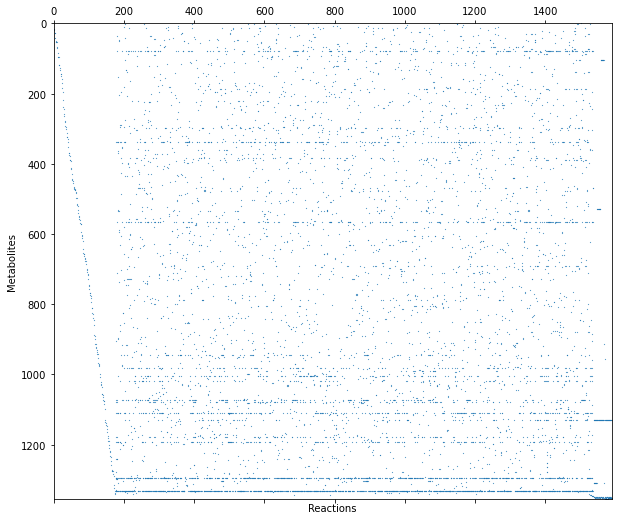

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.spy(S, precision=0.01, markersize=0.2)
plt.xlabel('Reactions')
plt.ylabel('Metabolites')
plt.show()

In [39]:
S_bin = np.where(S!=0., 1., 0.)

In [40]:
A_x = S_bin.dot(S_bin.T)

In [41]:
connectivities = A_x.diagonal()

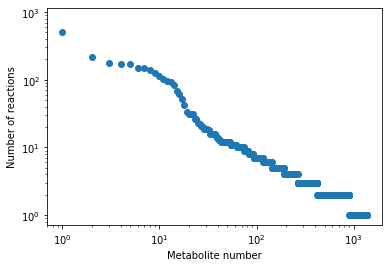

In [42]:
plt.loglog(sorted(connectivities, reverse=True), 'o')
plt.xlabel('Metabolite number')
plt.ylabel('Number of reactions')
plt.show()

In [43]:
connectivity = sorted(zip(model.metabolites, A_x.diagonal()), key=lambda item: item[1], reverse=True)
connectivity[0:10]

[(<Metabolite h_c at 0x1ccac9caee0>, 834.0),
 (<Metabolite h2o_c at 0x1ccac9ca7f0>, 508.0),
 (<Metabolite atp_c at 0x1ccac9b64c0>, 215.0),
 (<Metabolite nad_c at 0x1ccad24e040>, 179.0),
 (<Metabolite nadh_c at 0x1ccac970cd0>, 174.0),
 (<Metabolite pi_c at 0x1ccad26c190>, 173.0),
 (<Metabolite o2_c at 0x1ccac9acdc0>, 148.0),
 (<Metabolite adp_c at 0x1ccac9c0490>, 148.0),
 (<Metabolite h_e at 0x1ccac9caf10>, 140.0),
 (<Metabolite coa_c at 0x1ccac9b6880>, 127.0)]

In [44]:
solution = model.optimize()
fluxes = solution.fluxes
order = fluxes.sort_values()
print(order.index[0:10])

Index(['H2Ot', 'EX_o2_e', 'ACACT1r', 'EX_pi_e', 'SUCOAS', 'GL3PD', 'CO2t',
       'EX_nh4_e', 'EX_h_e', 'EX_fru_e'],
      dtype='object')
